In [1]:
from standardInclude import *
enable_atlas_root()

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = { 
      13:r.TFile("./data/rocks/results_station_13.root"),
      18:r.TFile("./data/rocks/results_station_18.root")
    }

In [3]:
caloToPlot = 18
tlow = 10
thigh = 550
timeRebinFactor = 10
func1 = False
allFitResults = []

f[caloToPlot].ls()

TFile**		./data/rocks/results_station_18.root	
 TFile*		./data/rocks/results_station_18.root	
  KEY: TH2I	allClusterY_vs_Time;1	Cluster y [mm] vs. Time
  KEY: TH3I	allTracks_yCalo_vs_yBeam_vs_Time;1	Track y vs. Extrapolated Calo y vs. Time
  KEY: TH3I	matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time;1	Tracker Calo y vs. Cluster Calo y vs. Time
  KEY: TH3I	matchedTracks_yBeam_vs_Time;1	Tracker Calo y vs. Cluster Calo y vs. Time


In [4]:
if(False):
    func = r.TF1("func","pol1",tlow,thigh)
    paramVec = [1,1]
elif(True):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
    func.SetParNames("C", "A", "#tau", "m")
    paramVec = [1,10,1,-0.0001,10]
elif(False):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*(x + [4]))) + [3]*((x))",tlow,thigh)
    func.SetParNames("C", "A", " #tau", "m", "A_{2}")
    paramVec = [1,10,1,-0.0001,10,0.001]
elif(False):
    func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*(x))) + [3]*((x)) + [4]*(x*x - [5])",tlow,thigh)
    paramVec = [1,10,1,-0.0001,10,0.001,-10]

---

# Lets plot all of these trends vs. time

## No randomization, but we can rebin enough to get rid of the annoying frequencies

---

### Start with all the clusters vs. time

---

In [5]:
allClusterY_vs_Time = f[caloToPlot].Get("allClusterY_vs_Time").Clone()
allClusterY_vs_Time.SetDirectory(0)
allClusterY_vs_Time.Rebin2D(timeRebinFactor,1)

<ROOT.TH2I object ("allClusterY_vs_Time") at 0x7fffce4b3800>

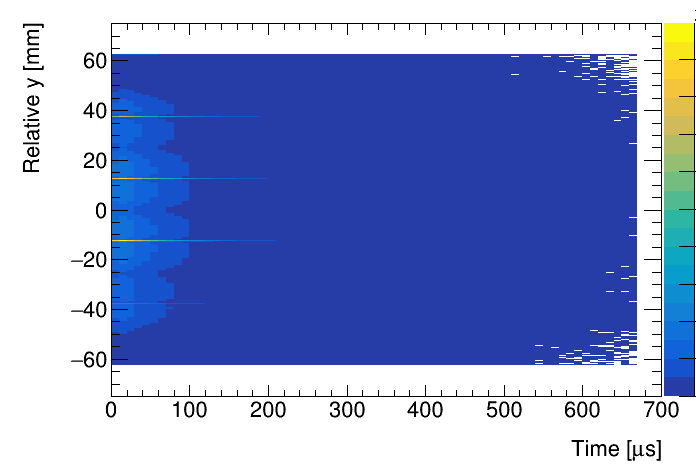

In [6]:
c = r.TCanvas()
allClusterY_vs_Time.Draw("colz")
c.Draw()

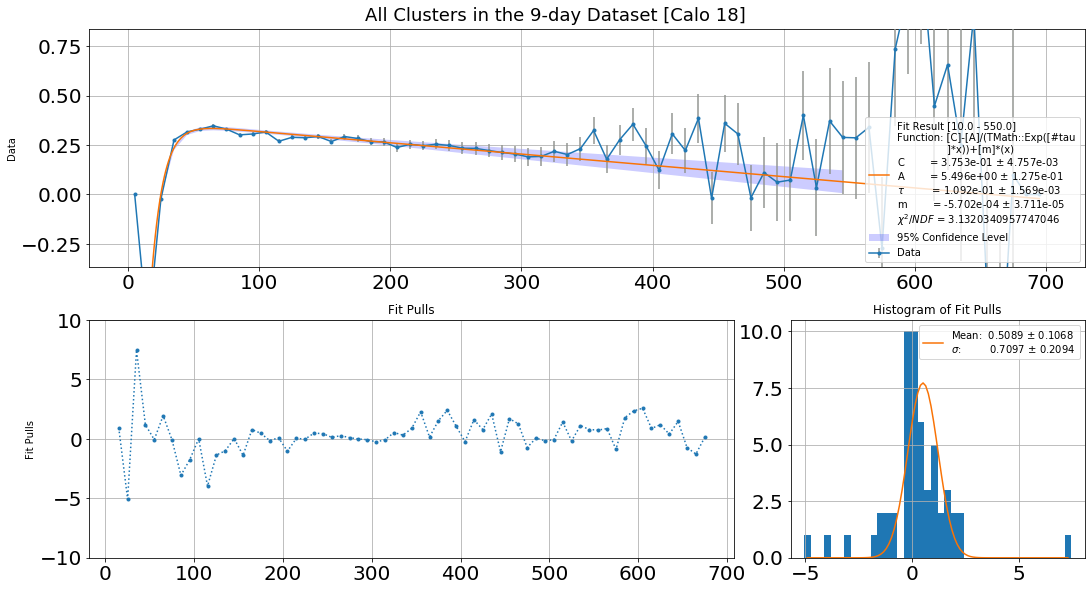

In [7]:
times, means, meanErrs = TH1ToNumpyArray( allClusterY_vs_Time.ProfileX() )
#means = [(x-3.)*25. for x in means]
#meanErrs = [(x)*25. for x in meanErrs]
for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fitresult.draw("All Clusters in the 9-day Dataset [Calo "+str(caloToPlot)+"]", yrange=[None, [-10,10]])

plt.show()

Restricting range of FFT to: [30, 550]


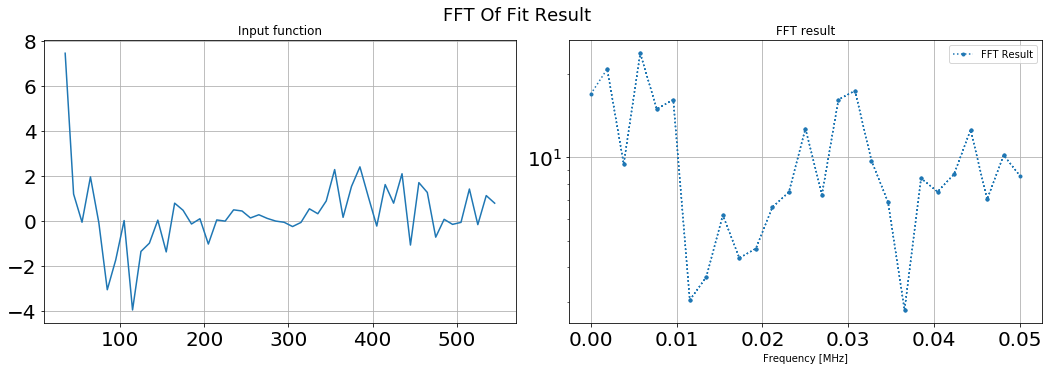

In [8]:
ding = fitresult.fft([30,550], 2)

---

### And now lets compare what the entire tracker sees

---

In [9]:
allTracks_yCalo_vs_yBeam_vs_Time = f[caloToPlot].Get("allTracks_yCalo_vs_yBeam_vs_Time").Clone()
allTracks_yCalo_vs_yBeam_vs_Time.SetDirectory(0)
allTracks_yCalo_vs_yBeam_vs_Time.Rebin3D(timeRebinFactor,1,1)

<ROOT.TH3I object ("allTracks_yCalo_vs_yBeam_vs_Time") at 0x7f870c280ca0>

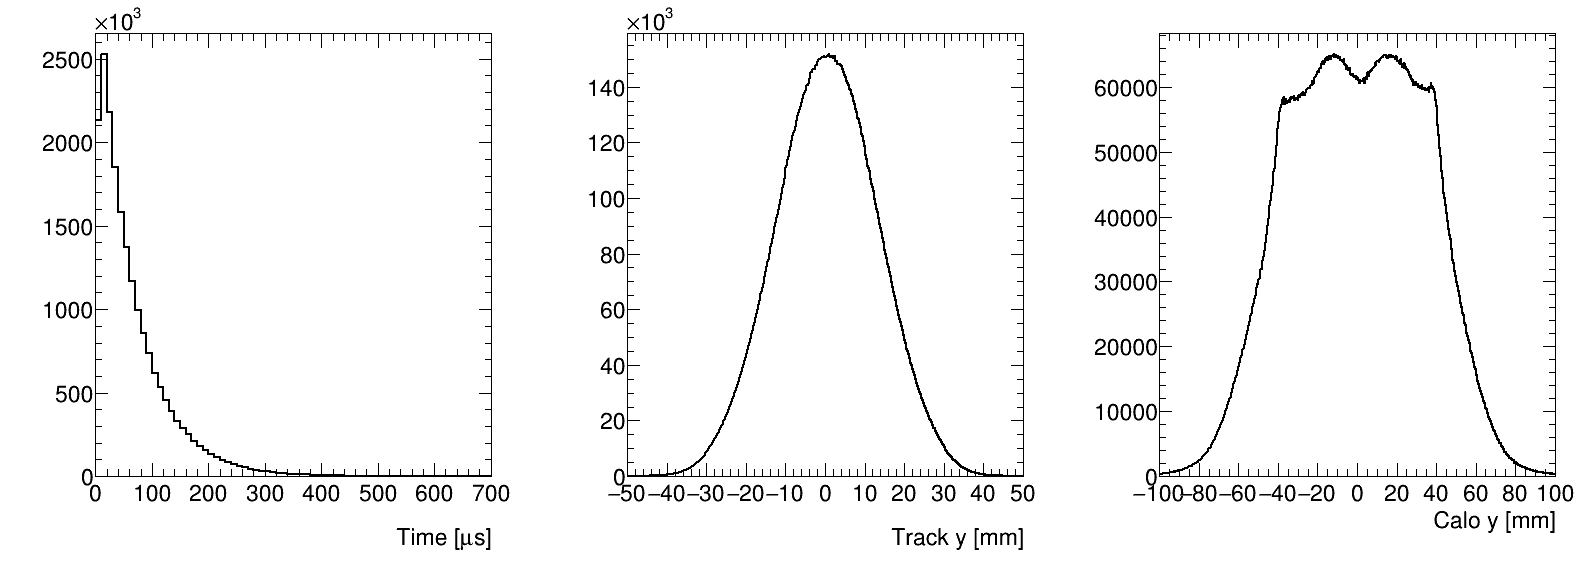

In [10]:
c = r.TCanvas("c","c",1600,600)
c.Divide(3,1)
for i, axi in enumerate(["x","y","z"]):
    c.cd(i+1)
    allTracks_yCalo_vs_yBeam_vs_Time.Project3D(axi).Draw()
c.Draw()

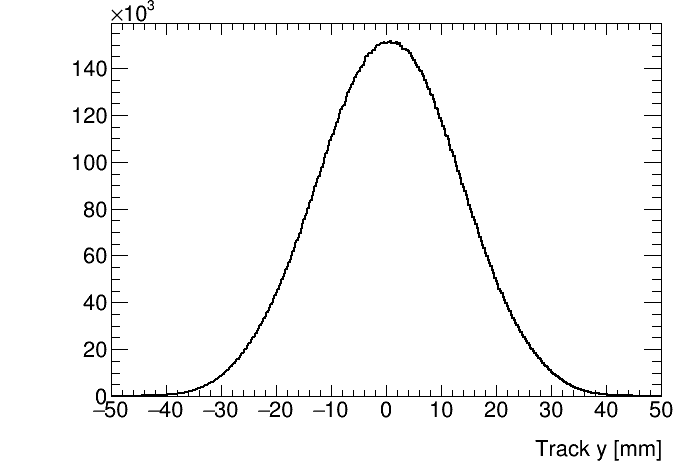

In [11]:
c = r.TCanvas()
allTracks_yCalo_vs_yBeam_vs_Time.Project3D("y").Draw("colz")
c.Draw()

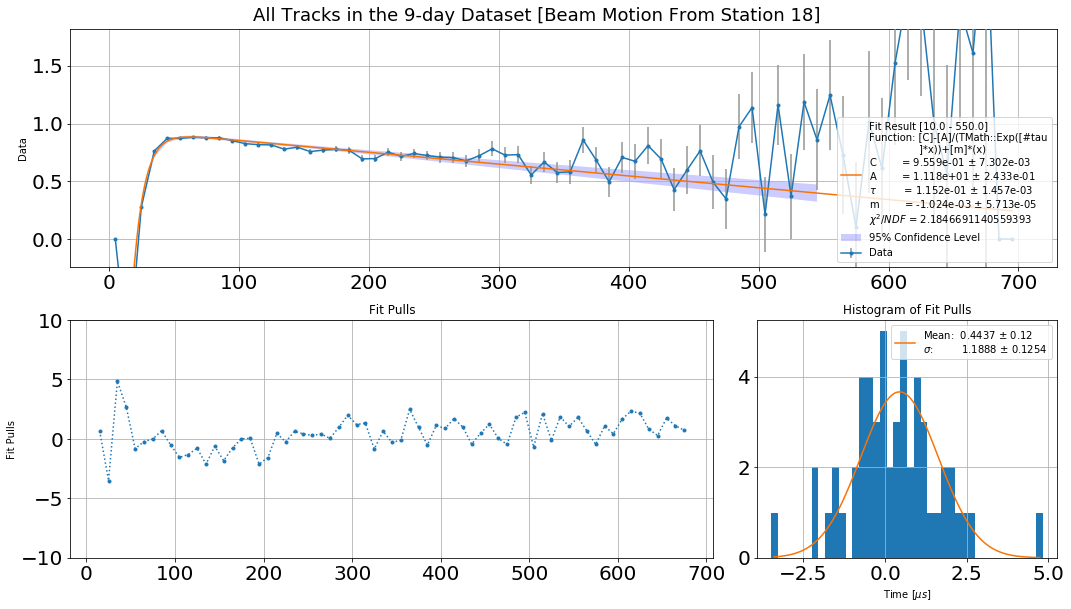

In [12]:
times, means, meanErrs = TH1ToNumpyArray( allTracks_yCalo_vs_yBeam_vs_Time.Project3D("yx").ProfileX() )

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)


fig,ax = fitresult.draw("All Tracks in the 9-day Dataset [Beam Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
plt.xlabel(r"Time [$\mu s$]")

plt.show()

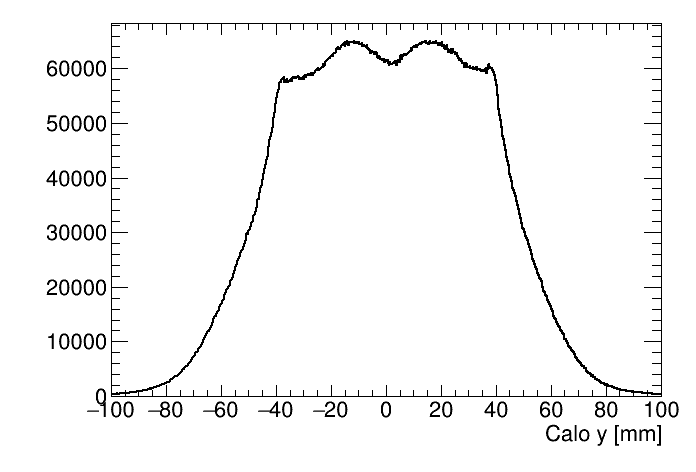

In [13]:
c = r.TCanvas()
allTracks_yCalo_vs_yBeam_vs_Time.Project3D("z").Draw("colz")
c.Draw()

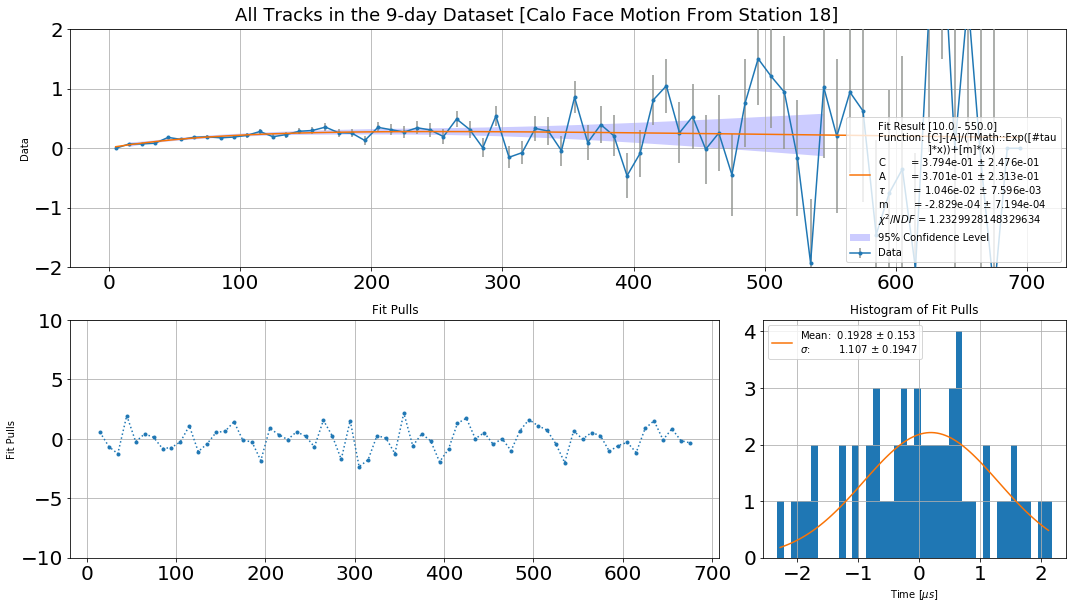

In [14]:
times, means, meanErrs = TH1ToNumpyArray( allTracks_yCalo_vs_yBeam_vs_Time.Project3D("zx").ProfileX() )

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fig,ax = fitresult.draw("All Tracks in the 9-day Dataset [Calo Face Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
ax[0].set_ylim(-2,2)
plt.xlabel(r"Time [$\mu s$]")

plt.show()


---

### And now the matched tracks

---

In [15]:
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time = f[caloToPlot].Get("matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time").Clone()
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.SetDirectory(0)
matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Rebin3D(timeRebinFactor,1,1)

<ROOT.TH3I object ("matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time") at 0x7f870c6f5a00>

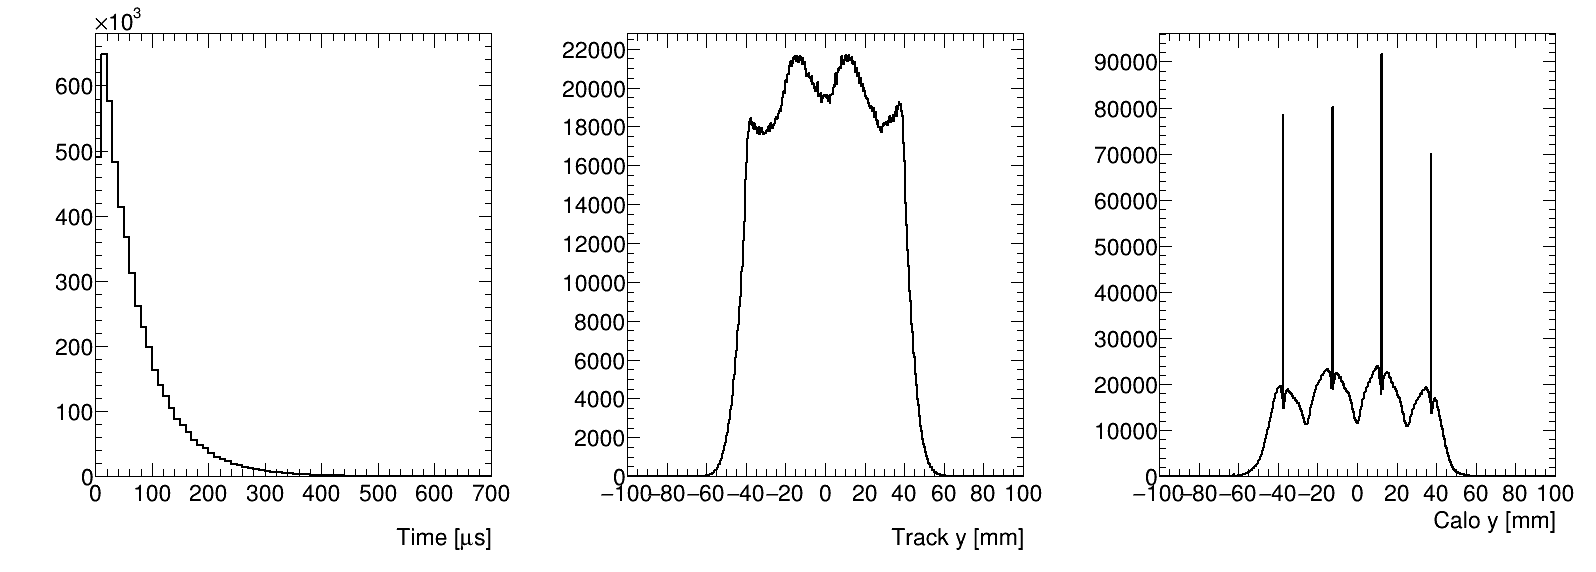

In [16]:
c = r.TCanvas("c","c",1600,600)
c.Divide(3,1)
for i, axi in enumerate(["x","y","z"]):
    c.cd(i+1)
    matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D(axi).Draw()
c.Draw()

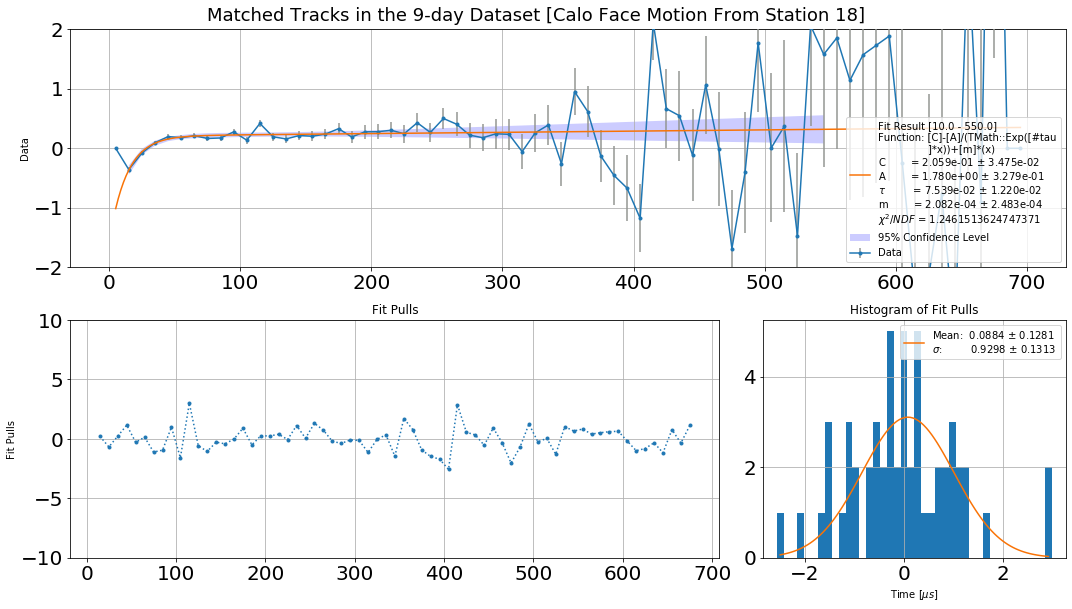

In [17]:
times, means, meanErrs = TH1ToNumpyArray( matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D("yx").ProfileX() )


paramVec = [1,10,1,0.0001,10,0.001]
for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fig,ax = fitresult.draw("Matched Tracks in the 9-day Dataset [Calo Face Motion From Station "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
ax[0].set_ylim(-2,2)
plt.xlabel(r"Time [$\mu s$]")


plt.show()

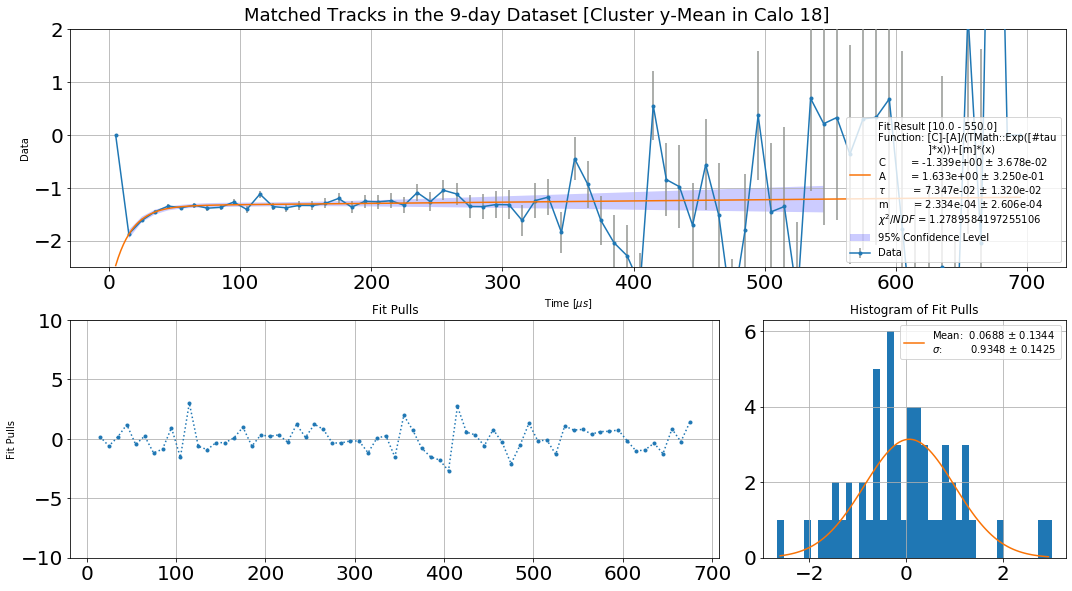

In [18]:
times, means, meanErrs = TH1ToNumpyArray( matchedTracks_yCaloTracks_vs_yCaloTracker_vs_Time.Project3D("zx").ProfileX() )

for i,xi in enumerate(paramVec):
    func.SetParameter(i,xi)
fitresult = fitVector(times, means, func, None, meanErrs)
allFitResults.append(fitresult)

fig,ax = fitresult.draw("Matched Tracks in the 9-day Dataset [Cluster y-Mean in Calo "+str(caloToPlot)+"]", yrange=[None, [-10,10]])
ax[0].set_xlabel(r"Time [$\mu s$]")
ax[0].set_ylim(-2.5,2)

plt.show()

---

### Now lets compare the fit results

---

In [19]:
print([x[1] for x in allFitResults])

[([0.3752915603422706, 5.496388930384719, 0.10922102710531262, -0.0005702368567485328], [0.0047570335957684805, 0.12747679914750143, 0.0015692126627084274, 3.7113347584645055e-05]), ([0.9558573109577164, 11.1791285665739, 0.11516052419877959, -0.001023780087960423], [0.007301517883003247, 0.24327907090151057, 0.0014569032829515767, 5.71268309779249e-05]), ([0.37941891305432, 0.370121182484772, 0.010455112769637039, -0.0002829073796416826], [0.2475828549730842, 0.23127472007672956, 0.00759588790387807, 0.0007194431473188995]), ([0.20589960383216888, 1.779922269189764, 0.07539379214690084, 0.00020815062384214848], [0.03474576426391272, 0.3278833995123676, 0.012195003277877694, 0.00024834836814756263]), ([-1.33920558227056, 1.6327893715231685, 0.07347413844049905, 0.00023340222297503092], [0.03677925577846754, 0.3249787784892859, 0.01319958286678522, 0.0002606393948388545])]


4
[3.1320340957747046, 2.1846691140559393, 1.2329928148329634, 1.2461513624747371, 1.2789584197255106]


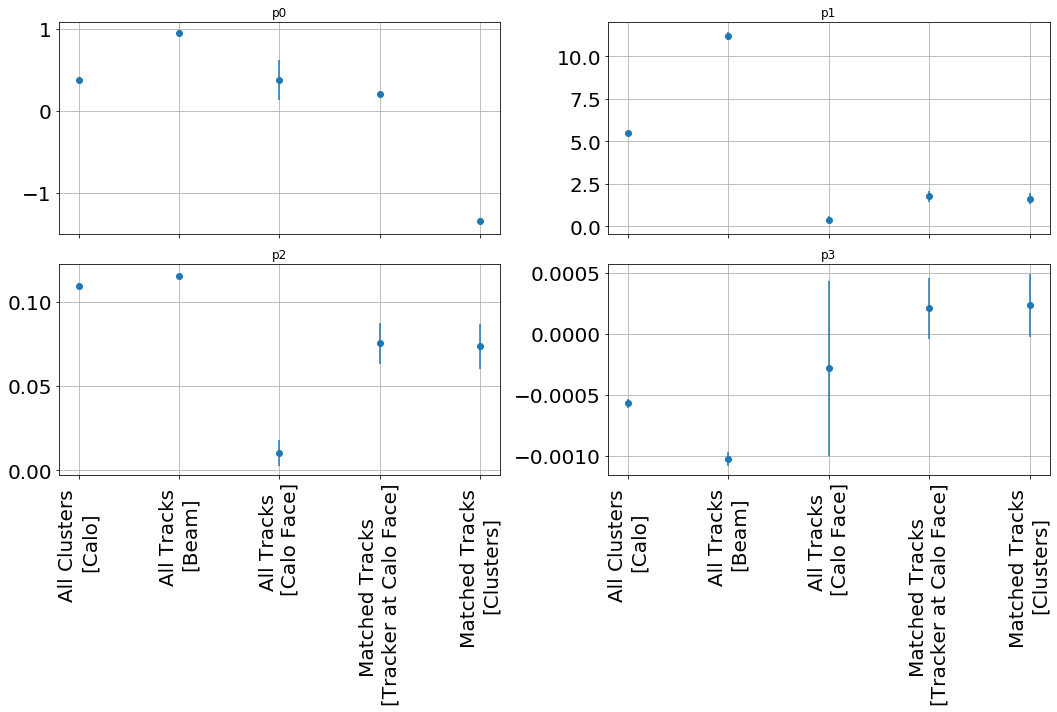

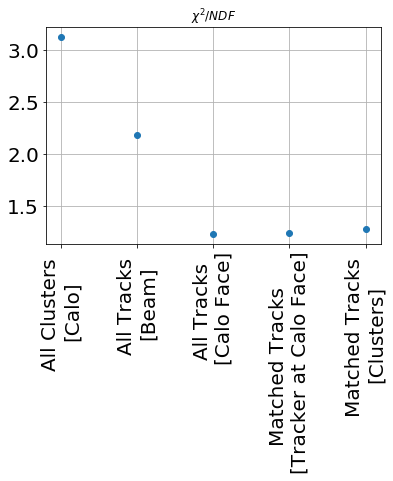

In [20]:
nPlots = len(allFitResults[0][1][0])
print(nPlots)

names = ["All Clusters \n[Calo]", "All Tracks \n[Beam]", 'All Tracks \n[Calo Face]', 
         'Matched Tracks \n[Tracker at Calo Face]', 'Matched Tracks \n[Clusters]']
parNames = ['p'+str(i) for i in range(nPlots)]

allPars, allParErrs = zip(*[x[1] for x in allFitResults])
allChiSquare = [x[2] for x in allFitResults]
print(allChiSquare)
parsByPar = zip(*allPars)
errsByPar = [x for x in zip(*allParErrs)]

fig,axs = plt.subplots(2,int((nPlots+1)/2), figsize=(15,10), sharex=True)
try:
    ax = flatten2dArray(axs)
except:
    ax = axs
for i,x in enumerate(parsByPar):
    axi = ax[i]
    axi.set_title(parNames[i])
    axi.errorbar([i for i in range(len(names))],x, yerr=errsByPar[i],fmt="o")
    axi.set_xticks([i for i in range(len(names))])
    axi.set_xticklabels(names,rotation=90)
    axi.grid()
    #axi.set_ylim(np.abs(x[0])*-5,np.abs(x[0])*5)
plt.tight_layout()
plt.show()


fig,ax = plt.subplots()
plt.plot(allChiSquare,"o")
plt.grid()
ax.set_xticks([i for i in range(len(names))])
ax.set_xticklabels(names,rotation=90)
plt.title(r"$\chi^{2} / NDF$")
plt.show()